In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import requests

# This is the case when you are planning to gain arbitrage. by buying and selling

In [48]:
class arbitrageFinder():
    def __init__(self, args, kwargs):
        pass
   

    def arbitrage(self):
        print("Exchange "+ self.exchanges[np.argmin(self.prices)]+  " has lowest "+ self.name+ " price " +str(np.min(self.prices))+"$")
        print("Exchange", self.exchanges[np.argmax(self.prices)], "has higest "+ self.name+ " price ",np.max(self.prices)+"$")
        self.prices=np.asarray(self.prices,'f')
        max=np.max(self.prices)
        min=np.min(self.prices)
#         diffrence=np.max(self.prices)-np.min(self.prices)

        d=max-min
        print("if you buy from", self.exchanges[np.argmin(self.prices)],"& sell in",self.exchanges[np.argmax(self.prices)],"\n you will get arbitrage of USD ",d)

    def plotGraph(self, prices, volumes, exchanges):
        plt.figure(figsize=(20,10))
        
        plt.scatter(prices,volumes)

        plt.xlabel("Prices", fontsize=40)
        plt.ylabel("Volumes", fontsize=40)
        plt.title(self.name+" ARBITRAGE FINDER", fontsize=30)
        for exchange, x,y in zip(exchanges, prices, volumes):
            plt.annotate(exchange, xy=(x, y), xytext=(-5, 5), textcoords='offset points', fontsize=20)
        plt.show()
        self.arbitrage()
    def getVolumePrice(self,df):
        
        self.exchanges=df['market'].values
        self.prices=df['price'].values
        #prices=np.asarray(prices,'f')
        self.volumes=df['volume'].values
        
       
        self.plotGraph(self.prices, self.volumes,self.exchanges)
                 
                 
    def getJsonData(self,url):
        page=requests.get(url)
        data=page.json()['ticker']['markets']
        self.df=pd.DataFrame(data)
        self.getVolumePrice(self.df)
        
        
    def urlFormatting(self,crypto):
        self.name=crypto.upper()
        
        self.url=('https://api.cryptonator.com/api/full/{}-usd').format(self.name)
        self.getJsonData(self.url)   
        

Enter the cryptoSymbol[eth ltc xmr, btc,nxt]:btc


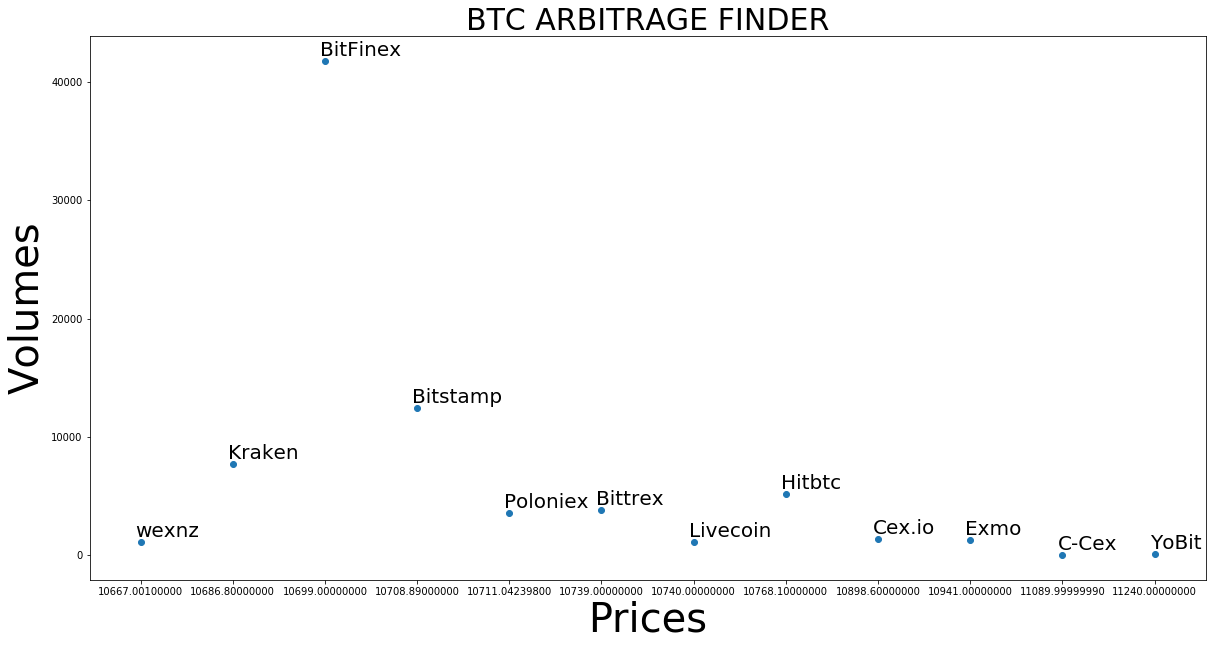

Exchange wexnz has lowest BTC price 10667.00100000$
Exchange YoBit has higest BTC price  11240.00000000$
if you buy from wexnz & sell in YoBit 
 you will get arbitrage of USD  572.999


In [49]:
def main():# [eth, ltc xmr, btc,nxt,etccc..]
    crypto=input("Enter the cryptoSymbol[eth ltc xmr, btc,nxt]:")
    btc=arbitrageFinder()
    btc.urlFormatting(crypto)


if __name__ in ('__main__'):
     main()

# Now the case is when you hold some crypto in some exchange and you want to gain max arbitrage.(how much exactly)

In [52]:
#to be continued